In [1]:
import plotnine as pl
import pandas as pd
from extract_experimental_results import *

## RQ1 - General Effectiveness

### Read in results data

#### Yes/No

In [2]:
results_csvs = ['../../results/evidence-misinformation/misinfo-answers-2021-yesno-run1.csv',\
               '../../results/evidence-misinformation/misinfo-answers-2022-yesno-run1.csv']
topics = read_topics(['../../data/misinfo-resources-2021/topics/misinfo-2021-topics.xml', \
                      '../../data/misinfo-resources-2021/topics/misinfo-2022-topics.xml'])
results_df = read_results_csv(csv_files=results_csvs, topics=topics, label="Prompt type: Yes/No")
results_df['GroundTruth'] = results_df['GroundTruth'].astype(str)
results_df['ChatGPTAnswer'] = results_df['ChatGPTAnswer'].astype(str)
evaluation = eval_answer_correctness_df(results_df)

INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/misinfo-answers-2021-yesno-run1.csv
INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/misinfo-answers-2022-yesno-run1.csv
INFO:extract_experimental_results:80 / 100 correct = 0.8


#### Yes/No/Unsure

In [3]:
results_csvs_unsure = ['../../results/evidence-misinformation/misinfo-answers-2021-yesnounsure-run1.csv',\
                      '../../results/evidence-misinformation/misinfo-answers-2022-yesnounsure-run1.csv']
results_unsure_df = read_results_csv(csv_files=results_csvs_unsure, topics=topics, label="Prompt type: Yes/No/Unsure")
results_unsure_df['GroundTruth'] = results_unsure_df['GroundTruth'].astype(str)
results_unsure_df['ChatGPTAnswer'] = results_unsure_df['ChatGPTAnswer'].astype(str)
evaluation_unsure = eval_answer_correctness_df(results_unsure_df)

INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/misinfo-answers-2021-yesnounsure-run1.csv
INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/misinfo-answers-2022-yesnounsure-run1.csv
INFO:extract_experimental_results:33 / 100 correct = 0.33


#### Combined

In [4]:
results_df = pd.concat([results_df, results_unsure_df])

### Calculate Evaulation Measures

In [5]:
print(evaluation)

     measure  value
0    Correct   80.0
1     Unsure    0.0
2  Incorrect   20.0
3      Total  100.0
4   Accuracy    0.8


In [6]:
print(evaluation_unsure)

     measure   value
0    Correct   33.00
1     Unsure   64.00
2  Incorrect    3.00
3      Total  100.00
4   Accuracy    0.33


Make results more readable for printing/display

In [7]:
# results_df['GPTText'] = [text[0:50]+'...' for text in results_df['GPTText']]
results_df['Correct'] = ["Correct" if answer else "Incorrect" for answer in results_df['Correct']]

Write out the whole table of results to LaTeX table:

In [8]:
# with open('../../papers/sigir2023-chatGPT-eliciting-model-knowledge-vs-prompt-knowledge/Sections/tables/questions_table.tex', 'w') as out_file:
#     out_file.write(
#         tabulate(results_df.drop(columns=['File','QueryId', 'GroundTruth', 'ChatGPTAnswer']), 
#                  tablefmt='latex', 
#                  showindex="never",
#                  headers='keys')
#     )

In [9]:
results_df.head()

,Label,File,QueryId,Question,GroundTruth,ChatGPTAnswer,Correct,Stance,GPTText
0,Prompt type: Yes/No,misinfo-answers-2021-yesno-run1.csv,101,Will wearing an ankle brace help heal achilles...,No,No,Correct,,No. Wearing an ankle brace may help provide s...
1,Prompt type: Yes/No,misinfo-answers-2021-yesno-run1.csv,102,Is a tepid sponge bath a good way to reduce fe...,No,Yes,Incorrect,,Yes. A tepid sponge bath can be a helpful way...
2,Prompt type: Yes/No,misinfo-answers-2021-yesno-run1.csv,103,Can folic acid help improve cognition and trea...,No,No,Correct,,No. Folic acid is an essential B-vitamin that...
3,Prompt type: Yes/No,misinfo-answers-2021-yesno-run1.csv,104,Does duct tape work for wart removal?,No,No,Correct,,No. While some people claim that duct tape ca...
4,Prompt type: Yes/No,misinfo-answers-2021-yesno-run1.csv,105,Should I apply ice to a burn?,No,Yes,Incorrect,,Yes. Applying ice to a burn can help to redu...


### Overall plot for RQ1

INFO:extract_experimental_results:200 / 200 correct = 1.0


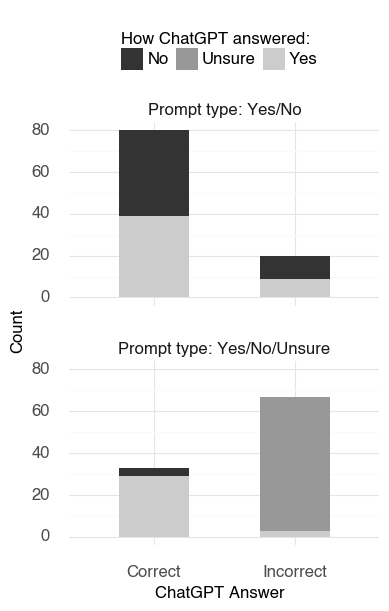

<ggplot: (351539973)>

In [10]:
#+ pl.scale_fill_manual(values = ["blue", "red"])
results_eval = eval_answer_correctness_df(results_df)

p = pl.ggplot(results_df, pl.aes(fill='ChatGPTAnswer', x='Correct')) \
+ pl.geom_bar(width=.5) \
+ pl.facet_wrap('Label', nrow=2) \
+ pl.xlab("ChatGPT Answer") \
+ pl.scale_fill_grey(name="How ChatGPT answered:")\
+ pl.ylab("Count") \
+ pl.theme_minimal() \
+ pl.theme(text=pl.element_text(size=12, family="Helvetica")) \
+ pl.theme(figure_size=(4,5.5), subplots_adjust={'hspace':.3}) \
+ pl.theme(legend_position='top')
p

In [11]:
p.save('../../papers/emnlp2023-healthgpt/Sections/figures/rq1.pdf')

/Users/koo01a/.local/share/virtualenvs/health-misinformation-rUy22Q7j/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5.5 in image.
/Users/koo01a/.local/share/virtualenvs/health-misinformation-rUy22Q7j/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../papers/emnlp2023-healthgpt/Sections/figures/rq1.pdf


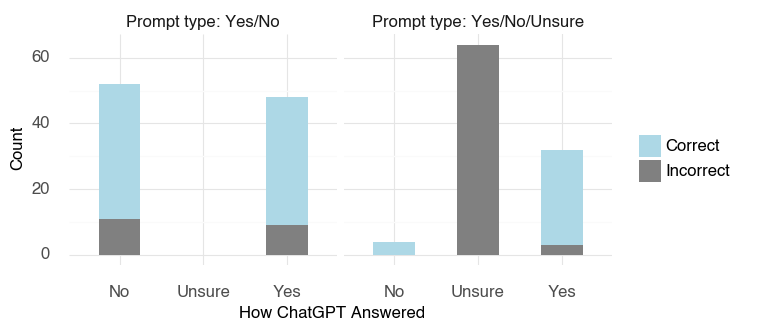

<ggplot: (379746673)>

In [53]:
p = pl.ggplot(results_df, pl.aes(x='ChatGPTAnswer', fill='Correct')) \
+ pl.geom_bar(width=.5) \
+ pl.facet_wrap('Label') \
+ pl.xlab("How ChatGPT Answered") \
+ pl.scale_fill_manual(values=['lightblue', 'grey'], name=" ") \
+ pl.ylab("Count") \
+ pl.theme_minimal() \
+ pl.theme(text=pl.element_text(size=12, family="Helvetica")) \
+ pl.theme(figure_size=(7,3), subplots_adjust={'hspace':.3}) \
+ pl.theme(panel_background = pl.element_rect(fill='white', colour='red'))
p

In [54]:
p.save('../../papers/emnlp2023-healthgpt/Sections/figures/rq1_unsure_counts.pdf')

/Users/koo01a/.local/share/virtualenvs/health-misinformation-YDb4-len/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 7 x 3 in image.
/Users/koo01a/.local/share/virtualenvs/health-misinformation-YDb4-len/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../papers/emnlp2023-healthgpt/Sections/figures/rq1_unsure_counts.pdf


##### RQ2 Evidence-based Evaulation

In [12]:
import plotnine as pl
import pandas as pd
from calculate_flipped import calculate_flipped, calc_flipped_totals
from extract_experimental_results import *

In [13]:
rq1_result_csvs = ['../../results/evidence-misinformation/misinfo-answers-2021-yesno-run1.csv',
                   '../../results/evidence-misinformation/misinfo-answers-2022-yesno-run1.csv']
rq2_result_csvs = ['../../results/evidence-misinformation/misinfo-answers-2021-yesno-with-passages-run1.csv']
all_results = calculate_flipped(rq1_result_csvs, rq2_result_csvs, label="Prompt type: Yes/No")

rq1_result_csvs_unsure = ['../../results/evidence-misinformation/misinfo-answers-2021-yesnounsure-run1.csv',\
                      '../../results/evidence-misinformation/misinfo-answers-2022-yesnounsure-run1.csv']
rq2_result_csvs_unsure = ['../../results/evidence-misinformation/misinfo-answers-2021-yesnounsure-with-passages-run1.csv']
all_results_unsure = calculate_flipped(rq1_result_csvs_unsure, rq2_result_csvs_unsure, label="Prompt type: Yes/No/Unsure")

all_results = pd.concat([all_results, all_results_unsure])


INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/misinfo-answers-2021-yesno-run1.csv
INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/misinfo-answers-2022-yesno-run1.csv
INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/misinfo-answers-2021-yesno-with-passages-run1.csv
INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/misinfo-answers-2021-yesnounsure-run1.csv
INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/misinfo-answers-2022-yesnounsure-run1.csv
INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/misinfo-answers-2021-yesnounsure-with-passages-run1.csv


In [14]:
eval_answer_correctness_df(all_results, correct_column='Correct_rq2', answer_column='ChatGPTAnswer_rq2')

INFO:extract_experimental_results:161 / 355 correct = 0.4535211267605634


,measure,value
0,Correct,161.000000
1,Unsure,116.000000
2,Incorrect,78.000000
3,Total,355.000000
4,Accuracy,0.453521


In [15]:
all_results['Correct_rq2'] = ["Correct" if answer else "Incorrect" for answer in all_results['Correct_rq2']]

In [16]:
all_results['Stance_rq2'] = all_results['Stance_rq2'].str.replace('in favour','Supporting evidence')
all_results['Stance_rq2'] = all_results['Stance_rq2'].str.replace('against','Contrary evidence')

In [17]:
yes_count = len(all_results.query('ChatGPTAnswer_rq2 == "Yes" & Label_rq2 == "Prompt type: Yes/No"'))
total_count = len(all_results.query('Label_rq2 == "Prompt type: Yes/No"'))
f"{yes_count}/{total_count}={yes_count/total_count}"

'109/177=0.615819209039548'

In [18]:
all_results.groupby(by=['Label_rq2','ChatGPTAnswer_rq2']).count()

Label_rq1  File_rq1  QueryId  \
Label_rq2                  ChatGPTAnswer_rq2                                 
Prompt type: Yes/No        No                        62        62       62   
                           Unsure                     6         6        6   
                           Yes                      109       109      109   
Prompt type: Yes/No/Unsure No                        10        10       10   
                           Unsure                   110       110      110   
                           Yes                       58        58       58   

                                              Question_rq1  GroundTruth  \
Label_rq2                  ChatGPTAnswer_rq2                              
Prompt type: Yes/No        No                           62           62   
                           Unsure                        6            6   
                           Yes                         109          109   
Prompt type: Yes/No/Unsure No                           10           10   
                           Unsure                      110          110   
                           Yes                          58           58   

                                              ChatGPTAnswer_rq1  Correct_rq1  \
Label_rq2                  ChatGPTAnswer_rq2                                   
Prompt type: Yes/No        No                                62           62   
                           Unsure                             6            6   
                           Yes                              109          109   
Prompt type: Yes/No/Unsure No                                10           10   
                           Unsure                           110          110   
                           Yes                               58           58   

                                              Stance_rq1  File_rq2  \
Label_rq2                  ChatGPTAnswer_rq2                         
Prompt type: Yes/No        No                         62        62   
                           Unsure                      6         6   
                           Yes                       109       109   
Prompt type: Yes/No/Unsure No                         10        10   
                           Unsure                    110       110   
                           Yes                        58        58   

                                              Question_rq2  Correct_rq2  \
Label_rq2                  ChatGPTAnswer_rq2                              
Prompt type: Yes/No        No                           62           62   
                           Unsure                        6            6   
                           Yes                         109          109   
Prompt type: Yes/No/Unsure No                           10           10   
                           Unsure                      110          110   
                           Yes                          58           58   

                                              Stance_rq2  Change Status  
Label_rq2                  ChatGPTAnswer_rq2                             
Prompt type: Yes/No        No                         62             62  
                           Unsure                      6              6  
                           Yes                       109            109  
Prompt type: Yes/No/Unsure No                         10             10  
                           Unsure                    110            110  
                           Yes                        58             58

In [19]:
all_results.groupby(by=['Change Status','Correct_rq2']).count()

Label_rq1  File_rq1  QueryId  Question_rq1  \
Change Status Correct_rq2                                               
Flipped       Correct             18        18       18            18   
              Incorrect           40        40       40            40   
Unchanged     Correct            143       143      143           143   
              Incorrect          131       131      131           131   
Unsure        Incorrect           23        23       23            23   

                           GroundTruth  ChatGPTAnswer_rq1  Correct_rq1  \
Change Status Correct_rq2                                                
Flipped       Correct               18                 18           18   
              Incorrect             40                 40           40   
Unchanged     Correct              143                143          143   
              Incorrect            131                131          131   
Unsure        Incorrect             23                 23           23   

                           Stance_rq1  Label_rq2  File_rq2  Question_rq2  \
Change Status Correct_rq2                                                  
Flipped       Correct              18         18        18            18   
              Incorrect            40         40        40            40   
Unchanged     Correct             143        143       143           143   
              Incorrect           131        131       131           131   
Unsure        Incorrect            23         23        23            23   

                           ChatGPTAnswer_rq2  Stance_rq2  
Change Status Correct_rq2                                 
Flipped       Correct                     18          18  
              Incorrect                   40          40  
Unchanged     Correct                    143         143  
              Incorrect                  131         131  
Unsure        Incorrect                   23          23

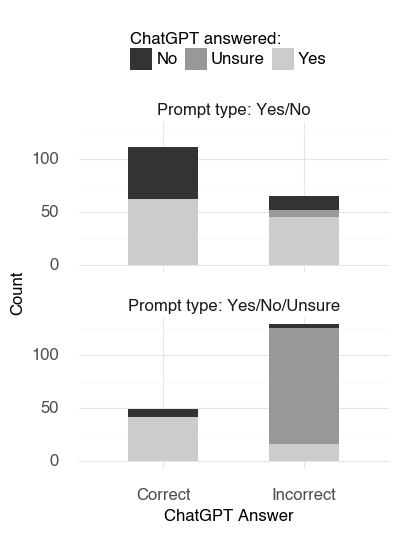

<ggplot: (332131557)>

In [20]:
p = pl.ggplot(all_results, pl.aes(fill='ChatGPTAnswer_rq2', x='Correct_rq2')) \
+ pl.geom_bar(width = 0.5) \
+ pl.facet_wrap('Label_rq1', nrow=2) \
+ pl.xlab("ChatGPT Answer") \
+ pl.ylab("Count") \
+ pl.scale_fill_grey(name="ChatGPT answered:")\
+ pl.theme_minimal() \
+ pl.theme(text=pl.element_text(size=12, family='Helvetica')) \
+ pl.theme(figure_size=(4,4.5), subplots_adjust={'hspace':.3}) \
+ pl.theme(legend_position='top')
p

In [21]:
p.save('../../papers/emnlp2023-healthgpt/Sections/figures/rq2.pdf')

/Users/koo01a/.local/share/virtualenvs/health-misinformation-rUy22Q7j/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 4.5 in image.
/Users/koo01a/.local/share/virtualenvs/health-misinformation-rUy22Q7j/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../papers/emnlp2023-healthgpt/Sections/figures/rq2.pdf


In [22]:
print(all_results.groupby(by=["Change Status"])["Change Status"].count())  # .transform(lambda x: x/x.sum()))

Change Status
Flipped       58
Unchanged    274
Unsure        23
Name: Change Status, dtype: int64


In [23]:
flipped_totals = calc_flipped_totals(all_results)

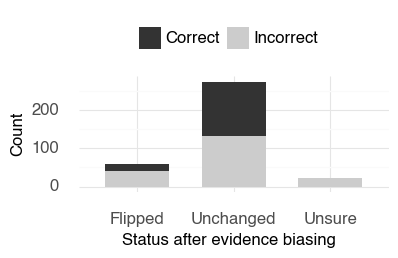

<ggplot: (332136400)>

In [24]:
p = pl.ggplot(all_results, pl.aes(x='Change Status', fill='Correct_rq2')) \
+ pl.geom_bar(width = 0.66) \
+ pl.xlab("Status after evidence biasing") \
+ pl.ylab("Count") \
+ pl.scale_fill_grey() \
+ pl.theme_minimal() \
+ pl.theme(text=pl.element_text(size=12, family='Helvetica')) \
+ pl.theme(figure_size=(4,1.5)) \
+ pl.theme(legend_position='top', legend_title=pl.element_blank()) \
+ pl.theme(strip_margin=30)
p

In [25]:
p.save('../../papers/emnlp2023-healthgpt/Sections/figures/rq2_flipped.pdf')

/Users/koo01a/.local/share/virtualenvs/health-misinformation-rUy22Q7j/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 1.5 in image.
/Users/koo01a/.local/share/virtualenvs/health-misinformation-rUy22Q7j/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../papers/emnlp2023-healthgpt/Sections/figures/rq2_flipped.pdf


## Does ChatGPT respond differently to Yes/No questions

In [26]:
all_results.query('Label_rq1 == "Prompt type: Yes/No/Unsure" & ChatGPTAnswer_rq1 == "Unsure"').groupby(by=["GroundTruth"]).count()

,Label_rq1,File_rq1,QueryId,Question_rq1,ChatGPTAnswer_rq1,Correct_rq1,Stance_rq1,Label_rq2,File_rq2,Question_rq2,ChatGPTAnswer_rq2,Correct_rq2,Stance_rq2,Change Status
GroundTruth,,,,,,,,,,,,,,
No,90,90,90,90,90,90,90,90,90,90,90,90,90,90
Yes,23,23,23,23,23,23,23,23,23,23,23,23,23,23


In [35]:
results_df['GroundTruth'] = results_df['GroundTruth'].astype('category')
results_df['GroundTruth'].cat.reorder_categories(['Yes', 'No'], inplace=True)

/var/folders/vt/lk0kvz4503g4_qh468vk008h0000gn/T/ipykernel_40459/3447268022.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.


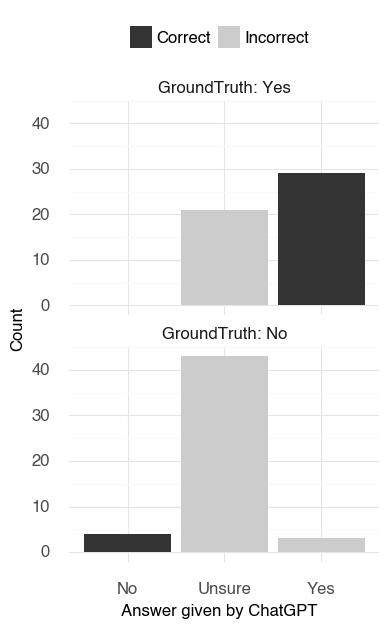

<ggplot: (335289077)>

In [39]:
p = pl.ggplot(results_df.query('Label == "Prompt type: Yes/No/Unsure"'), pl.aes(x='ChatGPTAnswer', fill="Correct")) \
+ pl.geom_bar() \
+ pl.facet_wrap('GroundTruth', labeller='label_both', nrow=2) \
+ pl.xlab("Answer given by ChatGPT") \
+ pl.ylab("Count") \
+ pl.scale_fill_grey() \
+ pl.theme_minimal() \
+ pl.theme(text=pl.element_text(size=12, family='Helvetica')) \
+ pl.theme(legend_position='top', legend_title=pl.element_blank()) \
+ pl.theme(figure_size=(4,6))

p

In [40]:
p.save('../../papers/emnlp2023-healthgpt/Sections/figures/gt_correctness2.pdf', transparent=False)

/Users/koo01a/.local/share/virtualenvs/health-misinformation-rUy22Q7j/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 6 in image.
/Users/koo01a/.local/share/virtualenvs/health-misinformation-rUy22Q7j/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../papers/emnlp2023-healthgpt/Sections/figures/gt_correctness2.pdf


## Reverse polarity Questions

In [ ]:
rev_topics = {k: ('Yes' if v == 'No' else 'No') for k,v in topics.items()}

#### Yes/No

In [328]:
revpol_results_csvs = ['../../results/evidence-misinformation/reversed-polarity/misinfo-answers-2021-yesno-reversed-polarity.csv',\
               '../../results/evidence-misinformation/reversed-polarity/misinfo-answers-2021-yesno-reversed-polarity.csv']
revpol_results_csvs_unsure = ['../../results/evidence-misinformation/reversed-polarity/misinfo-answers-2021-yesnounsure-reversed-polarity.csv',\
               '../../results/evidence-misinformation/reversed-polarity/misinfo-answers-2021-yesnounsure-reversed-polarity.csv']


rev_pol_results_df = read_results_csv(csv_files=revpol_results_csvs, topics=topics, label="Prompt: Yes/No (Reversed question)")
rev_pol_results_df['GroundTruth'] = rev_pol_results_df['GroundTruth'].astype(str)
rev_pol_results_df['ChatGPTAnswer'] = rev_pol_results_df['ChatGPTAnswer'].astype(str)

rev_pol_results_df_unsure = read_results_csv(csv_files=revpol_results_csvs_unsure, topics=topics, label="Prompt: Yes/No/Unsure (Reversed question)")
rev_pol_results_df_unsure['GroundTruth'] = rev_pol_results_df_unsure['GroundTruth'].astype(str)
rev_pol_results_df_unsure['ChatGPTAnswer'] = rev_pol_results_df_unsure['ChatGPTAnswer'].astype(str)

INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/reversed-polarity/misinfo-answers-2021-yesno-reversed-polarity.csv
INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/reversed-polarity/misinfo-answers-2021-yesno-reversed-polarity.csv
INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/reversed-polarity/misinfo-answers-2021-yesnounsure-reversed-polarity.csv
INFO:extract_experimental_results:Reading ../../results/evidence-misinformation/reversed-polarity/misinfo-answers-2021-yesnounsure-reversed-polarity.csv


In [329]:
revpol_evaluation = eval_answer_correctness_df(rev_pol_results_df)
revpol_evaluation

INFO:extract_experimental_results:56 / 100 correct = 0.56


,measure,value
0,Correct,56.00
1,Unsure,0.00
2,Incorrect,44.00
3,Total,100.00
4,Accuracy,0.56


In [330]:
revpol_evaluation_unsure = eval_answer_correctness_df(rev_pol_results_df_unsure)
revpol_evaluation_unsure

INFO:extract_experimental_results:4 / 100 correct = 0.04


,measure,value
0,Correct,4.00
1,Unsure,86.00
2,Incorrect,10.00
3,Total,100.00
4,Accuracy,0.04


In [331]:
rev_pol_results_df['Correct'] = ["Correct" if answer else "Incorrect" for answer in rev_pol_results_df['Correct']]
rev_pol_results_df_unsure['Correct'] = ["Correct" if answer else "Incorrect" for answer in rev_pol_results_df_unsure['Correct']]

In [332]:
rev_pol_results_df = pd.concat([results_df, rev_pol_results_df, rev_pol_results_df_unsure])

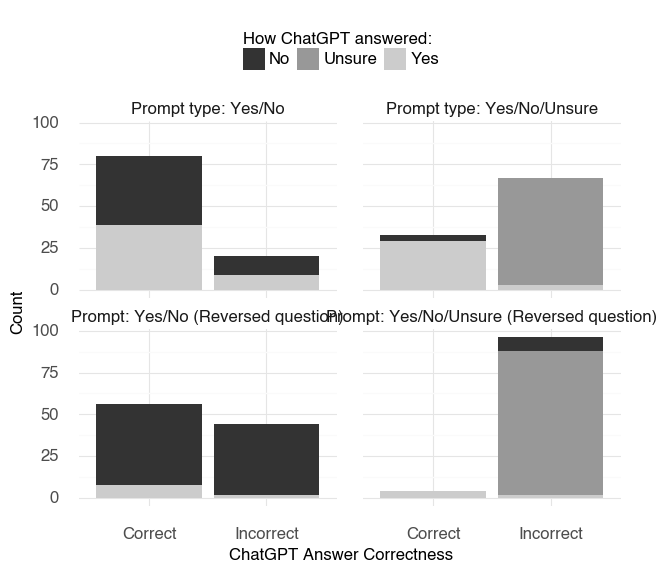

<ggplot: (677440194)>

In [333]:
p = pl.ggplot(rev_pol_results_df, pl.aes(fill='ChatGPTAnswer', x='Correct')) \
+ pl.geom_bar() \
+ pl.xlab("ChatGPT Answer Correctness") \
+ pl.facet_wrap('Label') \
+ pl.scale_fill_grey(name="How ChatGPT answered:")\
+ pl.ylab("Count") \
+ pl.theme_minimal() \
+ pl.theme(text=pl.element_text(size=12, family="Helvetica")) \
+ pl.theme(figure_size=(7,5), subplots_adjust={'wspace': .1}) \
+ pl.theme(legend_position='top')
p

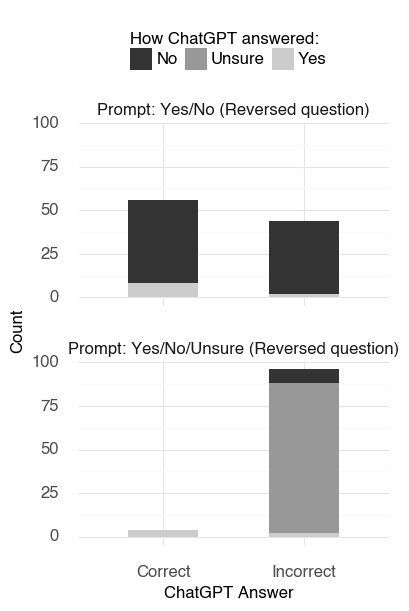

<ggplot: (678914571)>

In [368]:
p = pl.ggplot(rev_pol_results_df.query('Label.str.contains("Reversed")'), pl.aes(fill='ChatGPTAnswer', x='Correct')) \
+ pl.geom_bar(width = 0.5) \
+ pl.facet_wrap('Label', nrow=2) \
+ pl.xlab("ChatGPT Answer") \
+ pl.scale_fill_grey(name="How ChatGPT answered:")\
+ pl.ylab("Count") \
+ pl.theme_minimal() \
+ pl.theme(text=pl.element_text(size=12, family="Helvetica")) \
+ pl.theme(figure_size=(4,5.5), subplots_adjust={'hspace':.3}) \
+ pl.theme(legend_position='top')
p

In [369]:
p.save('../../papers/emnlp2023-healthgpt/Sections/figures/gt_rev_pol.pdf')

/Users/koo01a/.local/share/virtualenvs/health-misinformation-rUy22Q7j/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 5.5 in image.
/Users/koo01a/.local/share/virtualenvs/health-misinformation-rUy22Q7j/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../../papers/emnlp2023-healthgpt/Sections/figures/gt_rev_pol.pdf


### Split between Yes/No questions

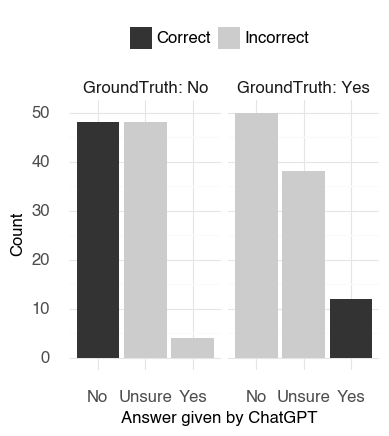

<ggplot: (674981024)>

In [372]:
p = pl.ggplot(rev_pol_results_df.query('Label.str.contains("Reversed")'), pl.aes(x='ChatGPTAnswer', fill="Correct")) \
+ pl.geom_bar() \
+ pl.facet_wrap('GroundTruth', labeller='label_both') \
+ pl.xlab("Answer given by ChatGPT") \
+ pl.ylab("Count") \
+ pl.scale_fill_grey() \
+ pl.theme_minimal() \
+ pl.theme(text=pl.element_text(size=12, family='Helvetica')) \
+ pl.theme(legend_position='top', legend_title=pl.element_blank()) \
+ pl.theme(figure_size=(4,3.5))

p